**Day-1:** Understanding Pytorch Tensors <br>
**Author:** Arun Prakash A <br>


**Tensor: The Fundamental Data Structure of PyTorch (DL in general)**
 * Multidimensional Array (ndarray) in Numpy 
 * Tensors in PyTorch

In [4]:
import torch

In [ ]:
# help(torch)

In [ ]:
print(torch.__version__)

1.12.1+cu113


Pytorch 2.0 has just got released a few weeks ago. However, the version 1.12 is more than enough for the workshop.

To know more: https://pytorch.org/get-started/pytorch-2.0/

# Some (Boring) things that you must be aware of

(From Python's view) What is the **torch** by the way?

   * Is it a module, class, function, method..?

In [2]:
torch

<module 'torch' from '/usr/local/lib/python3.8/dist-packages/torch/__init__.py'>

What does a module contains?

   * Function definitions
   * Imports of supporting packages
   * Class definitions and so on
   
  
Note: Module can be written in python and also in C/Cpp. 

In [1]:
with open(torch.__file__) as file:
  print(file.read())

* Let's see how many objects are callable in the **torch** module. <br>
* Note, callable doesn't mean it should be a pure function and it does not mean it should return something when called.
* classes are callable (calling a class returns a new instance); instances are callable if their class has a __call__() method.

In [ ]:
counter = 0
for (i,attrib) in enumerate(dir(torch)):
  if callable(eval(f'torch.{attrib}')):
    print(attrib,sep='',end='\t')
    counter += 1
    if (i+1)%10 == 0:
      print('\n')

AggregationType	AliasDb	AnyType	Argument	ArgumentSpec	BFloat16Storage	BFloat16Tensor	BenchmarkConfig	BenchmarkExecutionStats	

Block	BoolStorage	BoolTensor	BoolType	BufferDict	ByteStorage	ByteTensor	CallStack	Callable	

Capsule	CharStorage	CharTensor	ClassType	Code	CompilationUnit	CompleteArgumentSpec	ComplexDoubleStorage	ComplexFloatStorage	ComplexType	

ConcreteModuleType	ConcreteModuleTypeBuilder	DeepCopyMemoTable	DeserializationStorageContext	DeviceObjType	DictType	DisableTorchFunction	DoubleStorage	DoubleTensor	EnumType	

ErrorReport	ExecutionPlan	FatalError	FileCheck	FloatStorage	FloatTensor	FloatType	FunctionSchema	Future	

FutureType	Generator	Gradient	Graph	GraphExecutorState	HalfStorage	HalfTensor	IODescriptor	

InferredType	IntStorage	IntTensor	IntType	InterfaceType	JITException	ListType	LiteScriptModule	LockingLogger	LoggerBase	

LongStorage	LongTensor	MobileOptimizerType	ModuleDict	Node	NoneType	NoopLogger	NumberType	OperatorInfo	OptionalType	

ParameterDict	PyObjectType	P

* There are really so many to learn. Of course, we do use only a few (say 100+) of them. Fortunately we can group them into a few categories as listed in the documentation [page](https://pytorch.org/docs/stable/torch.html). <br>

* However, did you notice some familiar names in the output list of callables? 😀

In [ ]:
print('Number of callables in the module is: ',counter)

Number of callables in the module is:  1062


## Tensor

   

In [ ]:
type(torch.tensor)

builtin_function_or_method

* Observe that the type is `builtin_function_or_method `**not** a native python function.

In [ ]:
type(abs)

builtin_function_or_method

* We can define native python functions in a module and import them in the main script

* Let's see what is the type of such functions

In [ ]:
! touch calc.py 
#open the file and define some functions there
# def foo():
#   pass

# class myclass:
  
#   def __init__(self,a,b):
#     self.a = 1
#     self.b =1

#   def foo(self):
#     pass

In [ ]:
import importlib
import calc
importlib.reload(calc)

<module 'calc' from '/content/calc.py'>

In [ ]:
print(type(calc.foo))
print(type(calc.myclass))
print(type(calc.myclass.foo))

<class 'function'>
<class 'type'>
<class 'function'>


Are all the torch functions built-in (i.e., written in c/cpp)?
 
  * not necessarily

In [ ]:
print(type(torch.is_tensor))

<class 'function'>


Then, how many of them are built-in then?.

  * Roughly, $\frac{3}{4}$-th

In [2]:
import types
counter = 0
for (i,attrib) in enumerate(dir(torch)):
  if isinstance(eval(f'torch.{attrib}'),types.BuiltinFunctionType):
    print(attrib,sep='',end='\t')
    counter += 1
    if (i+1)%10 == 0:
      print('\n')

In [ ]:
print(counter)

891


Ok enough of all these!. Let's move on

# Creating a tensor object

   * tensor objects has **a support** to autograd, runs in GPU, etc..
   * Suppose we convert tensor obj to numpy then we losse all those feature.
   * Therefore, be aware of the data type of the objects that you are manipulating to avoid conflictions.

In [ ]:
help(torch.tensor)

Help on built-in function tensor in module torch:

tensor(...)
    tensor(data, *, dtype=None, device=None, requires_grad=False, pin_memory=False) -> Tensor
    
    Constructs a tensor with no autograd history (also known as a "leaf tensor", see :doc:`/notes/autograd`) by copying :attr:`data`.
    
    .. warning::
    
        When working with tensors prefer using :func:`torch.Tensor.clone`,
        :func:`torch.Tensor.detach`, and :func:`torch.Tensor.requires_grad_` for
        readability. Letting `t` be a tensor, ``torch.tensor(t)`` is equivalent to
        ``t.clone().detach()``, and ``torch.tensor(t, requires_grad=True)``
        is equivalent to ``t.clone().detach().requires_grad_(True)``.
    
    .. seealso::
    
        :func:`torch.as_tensor` preserves autograd history and avoids copies where possible.
        :func:`torch.from_numpy` creates a tensor that shares storage with a NumPy array.
    
    Args:
        data (array_like): Initial data for the tensor. Can be a li

In [4]:
# 0 dim or degree or rank tensor (rank has nothing to do with matrix rank)
x = torch.tensor(9) 
print(x,x.shape,x.ndim)

tensor(9) torch.Size([]) 0


In [5]:
x[0]

IndexError: ignored

In [ ]:
print(x.storage())

 9
[torch.storage._TypedStorage(dtype=torch.int64, device=cpu) of size 1]


In [ ]:
print(x.stride())

()


In [6]:
x = torch.tensor([9]) 
print(x,x.shape,x.ndim)

tensor([9]) torch.Size([1]) 1


In [7]:
x[0]

tensor(9)

In [ ]:
print(x.storage())
print(x.stride())

 9
[torch.storage._TypedStorage(dtype=torch.int64, device=cpu) of size 1]
(1,)


In [ ]:
x = torch.tensor([[9]]) 
print(x,x.shape,x.ndim)

tensor([[9]]) torch.Size([1, 1]) 2


ndim == len(x.shape)

In [ ]:
x = torch.tensor([[[9]]]) 
print(x,x.shape,x.ndim)

tensor([[[9]]]) torch.Size([1, 1, 1]) 3


**Vector** (Tensor of degree 1)

In [9]:
x = torch.randint(0,3,size=(2,),generator=torch.manual_seed(42))
print(x, x.shape, x.ndim)

tensor([0, 2]) torch.Size([2]) 1


**Matrix** (tensor of Degree 2)

In [ ]:
x = torch.randint(0,3,size=(2,2),generator=torch.manual_seed(42))
print(x, x.shape, x.ndim)

tensor([[0, 2],
        [1, 1]]) torch.Size([2, 2]) 2


## Storage

 * Multidimensional arrays are stored in a linear storage (that is all elements are contiguous) like RAM.
 * We have two options, either we follow row-major or column-major layout.
 * To know more: https://en.wikipedia.org/wiki/Row-_and_column-major_order

In [1]:
x.storage() # row major

NameError: ignored

In [ ]:
x.stride()

 * The stride for the 0th dim is 2 and the last dim is 1

In [ ]:
row = 1
col = 1
row_stride = 2
col_stride = 1 
x.storage()[row*row_stride + col*col_stride]

In [ ]:
x.view(2,2)

**Tensor** (of degree 3)

  * Print each elements in axis=0 (0th dimension). 
  * Each element in the zeroth dimenstion is the tensor of degree-2 (ndim-1, in general)

In [ ]:
x = torch.randint(0,3,size=(2,2,2),generator=torch.manual_seed(42))
print(x, x.shape, x.ndim)

In [ ]:
x.storage()

In [ ]:
x.stride()

Moving from right to left, 

* The stride for the rightmost dimension (dim 2, in this case) is always 1
* Then for dim-1 it is `x.size[-1]` = 2
* Then for dim-0 it is `x.size[-1]*x.size[-2]` = 2*2=4



**Tesnor** of Degree 4

  * We have no other option other than displaying elements in the dim-0 (axis-0) in a nice readable format (i.e., using nested square brackets). 

In [ ]:
x = torch.randint(0,3,size=(2,2,2,2),generator=torch.manual_seed(42))
print(x, x.shape, x.ndim)

Often, we don't need to go beyond the tensor of degree greater than 4 

## Why do we need to know about the logical (view) and physical representations using stride?

  * Suppose that we want to access diagonal elements of a matrix.
  * Assume that we don't have any methods to access the diagonal elements.
  * Naturally,we tend to loop over the matrix
  * Stride gives us the shortcut



In [ ]:
mat =torch.randint(0,3,size=(4,4),generator=torch.manual_seed(42))
print(mat)

tensor([[0, 2, 1, 1],
        [0, 2, 1, 2],
        [1, 2, 1, 1],
        [2, 0, 0, 1]])


In [ ]:
mat.diag()

tensor([0, 2, 1, 1])

SInce all the elements are stored in a row major form, we know that using stride value of 5 gives the diagonal elements.

In [ ]:
mat.storage()

 0
 2
 1
 1
 0
 2
 1
 2
 1
 2
 1
 1
 2
 0
 0
 1
[torch.storage._TypedStorage(dtype=torch.int64, device=cpu) of size 16]

In [ ]:
print(mat.as_strided([4],stride=[5]))

tensor([0, 2, 1, 1])


If you figured out the pattern, think about using strides first.

**Exercise:** Implement the convolution operation using strides (this is a convenient  way of doing it)

Is transposing the matrix costly?

 * No, transposing just changes the strides!
 * If $x \rightarrow $ stride:[3,1], then $x^T \rightarrow $stride[1,3]
 * It doesn't create any empty  matrix and displace elements from original matrix like we tend to think.

# What happesn if we assign a tensor to an another tensor?

  * Tensor by default only gives "view" of the tensor being re-assigned
  * Do clone if you need a copy of tensor (remember the memory requirement while you do so)

In [1]:
from collections import OrderedDict

In [20]:
_parameters = OrderedDict()
_parameters['w1']=torch.randn(size=(2,2))
w2 = _parameters['w1']
print(torch.allclose(w2,_parameters['w1']))
print(w2 is _parameters['w1'])
print(id(w2), id(_parameters['w1']))

True
True
139967270080000 139967270080000


In [16]:

def Parameter():
  _parameters = OrderedDict()
  _parameters['w1']=torch.randn(size=(2,2))
  print(_parameters['w1'])
  _parameters['w2']=torch.randn(size=(2,2))
  _parameters['w3']=torch.randn(size=(2,2))
  for value in _parameters.values():
    yield value


In [17]:
w1,w2,w3 = list(Parameter())
w1.

tensor([[ 1.5872, -0.5658],
        [-0.8205,  1.3451]])
tensor([[ 1.5872, -0.5658],
        [-0.8205,  1.3451]])


#**Unary operations** on Tensor

  * Unlike a scalar (vector or matrix), what we have now is a tensor. Therefore, there are many possible unary operations we can carry out on tensors.

  * The frequently used unary operations are negating, finding the max or argmax, index of an element, transpose the tensor, swapping the axis... 

  * These operations are further grouped into two types
   * **Reduction operations (reduce the size of array)**: argmin, amin, argmax, amax, dist,mean, sum,nansum,mode,unique
   * **Pointwise operations (does not change the shape of the tensor)**: Functions (sin,cos, atan..), logical (and,or,not,..), abs,pow,div,frac,clamp,...
  * we can either use inplace methods or functions (torch.functionName())

In [ ]:
# x is from the previous execution
print(x)

tensor([[[[0, 2],
          [1, 1]],

         [[0, 2],
          [1, 2]]],


        [[[1, 2],
          [1, 1]],

         [[2, 0],
          [0, 1]]]])


## Summing

* If we have a vector, summing it results in a scalar (dim-1 to dim-0)
* If we have a matrix $m \times n$, then summing along axis-0 will result in dim-1 vector of size $m$. (axis-1 results in dim-1 of size $n$)

In [ ]:
vector = torch.tensor([1,2,3,4.0])
print(vector.ndim)
torch.sum(vector)
print(torch.sum(vector).ndim)

1
0


In [ ]:
print(torch.sum(x))

tensor(17)


In [ ]:
print(torch.sum(x,axis=0)) # sum the elements in axis 0, axis 0 contains 2 elements of each size 2 x 2 x 2, so the result is also of same size 
print(torch.sum(x,axis=0).shape) # note the change in shape after adding results

tensor([[[1, 4],
         [2, 2]],

        [[2, 2],
         [1, 3]]])
torch.Size([2, 2, 2])


What if we don't wanto to change the dim of the returned array? keep the original dimension of $x$.

In [ ]:
print(torch.sum(x,axis=0,keepdim=True)) 
print(torch.sum(x,axis=0,keepdim=True).shape) 

tensor([[[[1, 4],
          [2, 2]],

         [[2, 2],
          [1, 3]]]])
torch.Size([1, 2, 2, 2])


In [ ]:
print(torch.sum(x,axis=1))#sum the elements in axis 1, axis 1 contains 2 elements of each size 2 x 2, so the result is also of same size 
print(torch.sum(x,axis=1).shape)

tensor([[[0, 4],
         [2, 3]],

        [[3, 2],
         [1, 2]]])
torch.Size([2, 2, 2])


In [ ]:
print(torch.sum(x,axis=2))
print(torch.sum(x,axis=2).shape)

tensor([[[1, 3],
         [1, 4]],

        [[2, 3],
         [2, 1]]])
torch.Size([2, 2, 2])


In [ ]:
print(torch.sum(x,axis=3))
print(torch.sum(x,axis=3).shape)

tensor([[[2, 2],
         [2, 3]],

        [[3, 2],
         [2, 1]]])
torch.Size([2, 2, 2])


Suppose we **do not know** the dim of an array (as happens in the intermediate computations). However, we want to sum the elements along the last dimension. What do you do then?. The straightforward approach is to use python flexible indexing schemes

In [ ]:
print(torch.sum(x,axis=-1))
print(torch.sum(x,axis=-1).shape)

tensor([[[2, 2],
         [2, 3]],

        [[3, 2],
         [2, 1]]])
torch.Size([2, 2, 2])


# Binary Operations

Let's take a tough problem. <br>
* We have $x$ of shape $2 \times 2 \times 2 \times 2$
* Suppose i have an another tensor of same size (shape). Then I can do element wise multiplication or matrix multiplication along a particular axis.

Elementwise multiplication. <br>
* Output size = $2 \times 2 \times 2 \times 2$

In [ ]:
print(x)

tensor([[[[0, 2],
          [1, 1]],

         [[0, 2],
          [1, 2]]],


        [[[1, 2],
          [1, 1]],

         [[2, 0],
          [0, 1]]]])


In [ ]:
y = torch.randint(0,3,size=(2,2,2,2),generator=torch.manual_seed(10))
print(y)

tensor([[[[2, 0],
          [0, 1]],

         [[0, 2],
          [2, 1]]],


        [[[1, 0],
          [2, 2]],

         [[1, 2],
          [2, 2]]]])


In [ ]:
print(torch.mul(x,y))

tensor([[[[0, 0],
          [0, 1]],

         [[0, 4],
          [2, 2]]],


        [[[1, 0],
          [2, 2]],

         [[2, 0],
          [0, 2]]]])


What happens if we do matrix multiplication?

  * WHat is the dimension? 

In [ ]:
print(torch.matmul(x,y))

tensor([[[[0, 2],
          [2, 1]],

         [[4, 2],
          [4, 4]]],


        [[[5, 4],
          [3, 2]],

         [[2, 4],
          [2, 2]]]])


In [ ]:
print(x[0,0,:,:])
print(y[0,0,:,:])

tensor([[0, 2],
        [1, 1]])
tensor([[2, 0],
        [0, 1]])


In [ ]:
print(torch.matmul(x[0,0,:,:],y[0,0,:,:]))

tensor([[0, 2],
        [2, 1]])


Let's change the dimension of y to $2 \times 2 \times 2 \times 4$

In [ ]:
y = torch.randint(0,3,size=(2,2,2,4),generator=torch.manual_seed(10))
print(y)

tensor([[[[2, 0, 0, 1],
          [0, 2, 2, 1]],

         [[1, 0, 2, 2],
          [1, 2, 2, 2]]],


        [[[1, 2, 1, 2],
          [1, 0, 1, 2]],

         [[2, 2, 2, 1],
          [1, 0, 2, 2]]]])


In [ ]:
print(torch.matmul(x,y))

tensor([[[[0, 4, 4, 2],
          [2, 2, 2, 2]],

         [[2, 4, 4, 4],
          [3, 4, 6, 6]]],


        [[[3, 2, 3, 6],
          [2, 2, 2, 4]],

         [[4, 4, 4, 2],
          [1, 0, 2, 2]]]])


In [ ]:
print(torch.matmul(x[0,0,:,:],y[0,0,:,:]))

tensor([[0, 4, 4, 2],
        [2, 2, 2, 2]])


Dimensionaltiy compatibility is checked for last two dimensions of the tensors being multiplied

In [ ]:
y = torch.randint(0,3,size=(2,2,4,4),generator=torch.manual_seed(10))
print(torch.matmul(x,y))

RuntimeError: ignored

Note the words in error message: Batch-2, first two dimensions.. because 

In [ ]:
y = torch.randint(0,3,size=(2,3,4,4),generator=torch.manual_seed(10))
print(torch.matmul(x,y))

RuntimeError: ignored

singletong dim is the one where the size of dim is 1

In [ ]:
y = torch.randint(0,3,size=(4,2,4,4),generator=torch.manual_seed(10))
print(torch.matmul(x,y))

RuntimeError: ignored

In [ ]:
y = torch.randint(0,3,size=(2,1,2,4),generator=torch.manual_seed(10))
print(torch.matmul(x,y))

tensor([[[[0, 4, 4, 2],
          [2, 2, 2, 2]],

         [[0, 4, 4, 2],
          [2, 4, 4, 3]]],


        [[[3, 4, 6, 6],
          [2, 2, 4, 4]],

         [[2, 0, 4, 4],
          [1, 2, 2, 2]]]])


# Load image 

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np
from matplotlib import pyplot as plt

* We do make conversion from one format to other say, torch to numpy, often. Underthehood, they use zero-copy interoperability protocol called [buffer protocol](https://docs.python.org/3/c-api/buffer.html) recommended by python. 

* Therefore, those operations are not **memory/computational** intensive.

In [ ]:
response = requests.get("https://media.istockphoto.com/photos/beautiful-lionhead-goldfish-swimming-in-the-aquarium-picture-id905382158")
img = Image.open(BytesIO(response.content))
img = np.array(img)

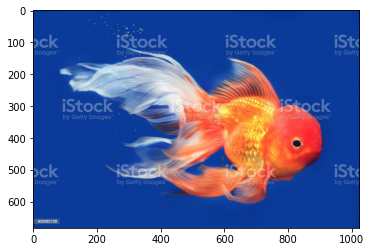

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
t_img = torch.tensor(img)
print(t_img.shape)

torch.Size([683, 1024, 3])


Each element in 0-th dimension represents?

 * Each element is of size 1024 x 3. That is, it still follows row major order where it takes rows in all 3 dimensions.

 * Let's do transpose (again, it is not a computational intensive operation, it is just manipulating stride, offset,..)

TypeError: ignored

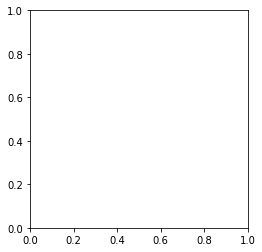

In [ ]:
t_img_T =  t_img.T
plt.imshow(np.array(t_img_T))
plt.show()

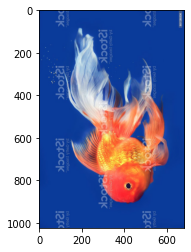

In [ ]:
t_img_T =  torch.transpose(t_img,dim0=1,dim1=0)
plt.imshow(np.array(t_img_T))
plt.show()

What if we want to transpose more than 2 dims? We call that permute...

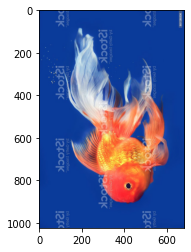

In [ ]:
t_img_T =  torch.permute(t_img,(1,0,2))
plt.imshow(np.array(t_img_T))
plt.show()